# Day 6: Constrained Optimization

---

- Challenges
  - 1d constrained example; gradient nonzero
  - Feasibility
- Types of constraints
  - Equality
  - Inequality
- Interpreting constraints
  - Implicit curve
  - Explicit curve
  - Constraint as contours; gradient
- Equality constraints
  - Lagrange multipliers
- Inequality constraints
  - KKT conditions


In [17]:
import grama as gr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from plotnine import *
DF = gr.Intention()

# Set figure options
plt.rcParams['figure.figsize'] = [6, 6] # Need square aspect ratio for gradients to appear normal
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


## Challenges

---

With constraints, stationarity is no longer sufficient. For example:

$$\min\, f(x) = \exp(x)$$
$$\text{wrt.}\, x$$
$$\text{s.t.}\, x \geq 0.2$$


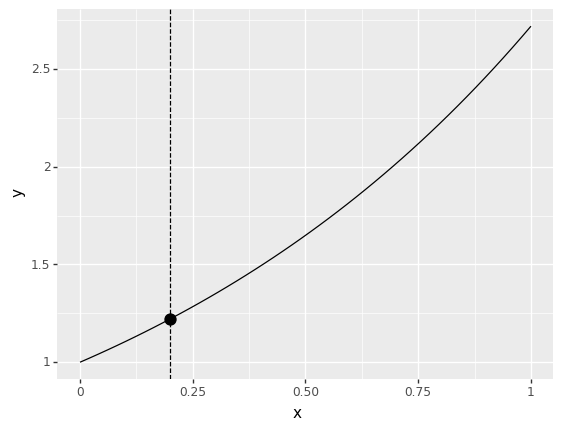

<ggplot: (8781966779041)>

In [4]:
x_s = 0.2

(
    gr.df_make(x=np.linspace(0, 1))
    >> gr.tf_mutate(y=gr.exp(DF.x))
    >> ggplot(aes("x", "y"))
    + geom_line()
    + geom_point(data=gr.df_make(x=x_s, y=np.exp(x_s)), size=4)
    + geom_vline(xintercept=x_s, linetype="dashed")
)


The gradient is clearly nonzero! The conditions for *constrained* optimality must be different from the unconstrained stationarity conditions.


Constraints also limit our feasible region

**TODO** some examples


## Types of Constraints

---

### Equality constraint

$$\text{s.t.}\, h(x) = 0$$

Must be satisfied

### Inequality constraint

$$\text{s.t.}\, g(x) \leq 0$$

Can be active or inactive


## Interpreting constraints

---

Let's look at an example

$$\text{s.t.}\, h(x, y) = x + y - 1 = 0$$

This is an *implicit* curve; only those values of $x, y$ that satisfy the constraint $h(x, y) = 0$ are on the constraint. We can make it explicit by solving for one of the variables. For this one $y = 1 - x$.

Note that we can also plot contours of the constraint function; only the zero-contour is feasible.


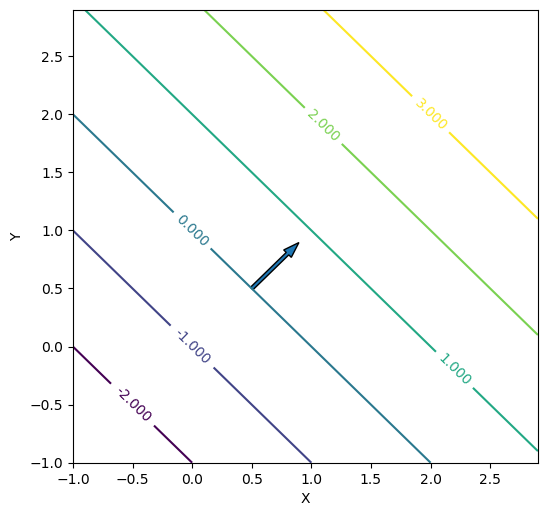

In [15]:
# Constraint as contour
fun_con = lambda X: X[0] + X[1] - 1

delta = 0.1
x = np.arange(-1, +3, delta)
y = np.arange(-1, +3, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = fun_con([X[i, j], Y[i, j]])
        
# Create contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=[-2, -1, 0, +1, +2, +3])
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")
a_grad = plt.arrow(
    0.5, # x base
    0.5, # y base
    0.3, # dx
    0.3, # dy
    width=0.03,
)

Note that the constraint function has its own gradient. This plays an important role in constrained optimization.

Let's look at some points that satisfy the constraint, and compare them against objective contours.


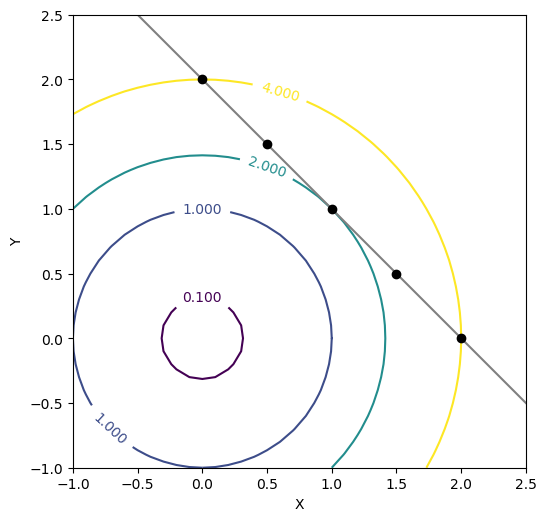

In [21]:
# NOTE: No need to edit, run and inspect
# Objective function
fun_bowl = lambda X: X[0]**2 + X[1]**2
# Gradient
grad_bowl = lambda X: np.array([X[0], X[1]])
# Constraint, as line
fun_line = lambda x: -x + 2

# Contour data
delta = 0.1
x = np.arange(-1, +3, delta)
y = np.arange(-1, +3, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = fun_bowl([X[i, j], Y[i, j]])
# Constraint data
y_line = list(map(fun_line, x))
# Gradient data
x_s = np.array([1, 1])
g_s = grad_bowl(x_s) * 0.3
        
# Create contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=[0.1, 1.0, 2.0, 4.0])
plt.plot(x, y_line, color="gray")
plt.plot(x_s[0], x_s[1], "k.", markersize=12)
plt.plot(
    [0.0, 0.5, 1.5, 2.0], 
    [2.0, 1.5, 0.5, 0.0],
     "k.", 
     markersize=12
)

# Use proxy artists for legend
a_con = mpatches.Patch(color='gray', label='Constraint')

# Plot tail
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim((-1.0, +2.5))
plt.ylim((-1.0, +2.5))
ax.set_aspect(aspect=1)

Note that the minimum along the